In [665]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [666]:
## Loading data


In [667]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
pd.set_option('display.max_columns', None)
df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [668]:
df.describe().round(2)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25976.00,25893.00
mean,12987.50,65005.66,39.62,1193.79,2.72,3.05,2.76,2.98,3.22,3.26,3.45,3.36,3.39,3.35,3.63,3.31,3.65,3.29,14.31,14.74
std,7498.77,37611.53,15.14,998.68,1.34,1.53,1.41,1.28,1.33,1.36,1.32,1.34,1.28,1.32,1.18,1.27,1.18,1.32,37.42,37.52
min,0.00,17.00,7.00,31.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,6493.75,32170.50,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,12987.50,65319.50,40.00,849.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,19481.25,97584.25,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,25975.00,129877.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1128.00,1115.00


In [669]:
## Data cleaning


In [670]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [671]:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [672]:
df['Arrival Delay in Minutes']

0        44.0
1         0.0
2         0.0
3         6.0
4        20.0
         ... 
25971     0.0
25972     0.0
25973     0.0
25974     0.0
25975     0.0
Name: Arrival Delay in Minutes, Length: 25976, dtype: float64

In [673]:
df['Arrival Delay in Minutes'].mean()

14.74085660217047

In [674]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

In [675]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [676]:
## Charts

([<matplotlib.patches.Wedge at 0x7fda38dd3130>,
 [Text(-0.20957359088360364, 1.0798513369923437, 'neutral or dissatisfied'),
  Text(0.20957359088360372, -1.0798513369923437, 'satisfied')],
 [Text(-0.11431286775469288, 0.5890098201776419, '56.1%'),
  Text(0.11431286775469293, -0.5890098201776419, '43.9%')])

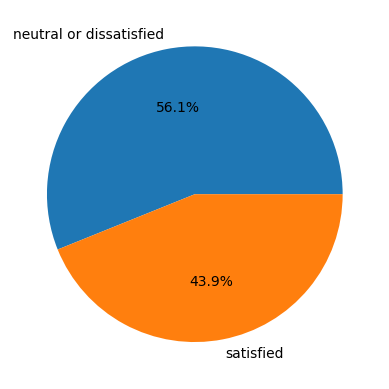

In [677]:
plt.pie(df['satisfaction'].value_counts(), labels=['neutral or dissatisfied', 'satisfied'], autopct='%1.1f%%')

In [678]:
## Encoding data



In [679]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [680]:
df.select_dtypes(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Female,Loyal Customer,Business travel,Eco,satisfied
1,Female,Loyal Customer,Business travel,Business,satisfied
2,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied
3,Male,Loyal Customer,Business travel,Business,satisfied
4,Female,Loyal Customer,Business travel,Eco,satisfied
...,...,...,...,...,...
25971,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
25972,Male,Loyal Customer,Business travel,Business,satisfied
25973,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
25974,Male,Loyal Customer,Business travel,Business,satisfied


In [681]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [682]:

df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [683]:

df['Type of Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [684]:

df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [685]:
# option 1


#df.replace({
#     'Gender':{
#         'Male': 1,
#         'Female': 2
#     },
#     'Customer Type':{
#         'Loyal Customer': 1,
#         'disloyal Customer': 2
#     },
#     'Type of Travel':{
#         'Business travel': 1,
#         'Personal Travel': 2
#     },
#     'Class':{
#         'Eco': 1,
#         'Business': 2,
#         'Eco Plus': 3
#     },
# }, inplace=True)

In [686]:
# option 2
columns = df.select_dtypes(include='object').drop(columns='satisfaction').columns

label_encoder = LabelEncoder()

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])


df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,0,0,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,0,0,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,1,1,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,1,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,0,0,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [687]:
df.dtypes


Unnamed: 0                             int64
id                                     int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [688]:
## Additional Charts


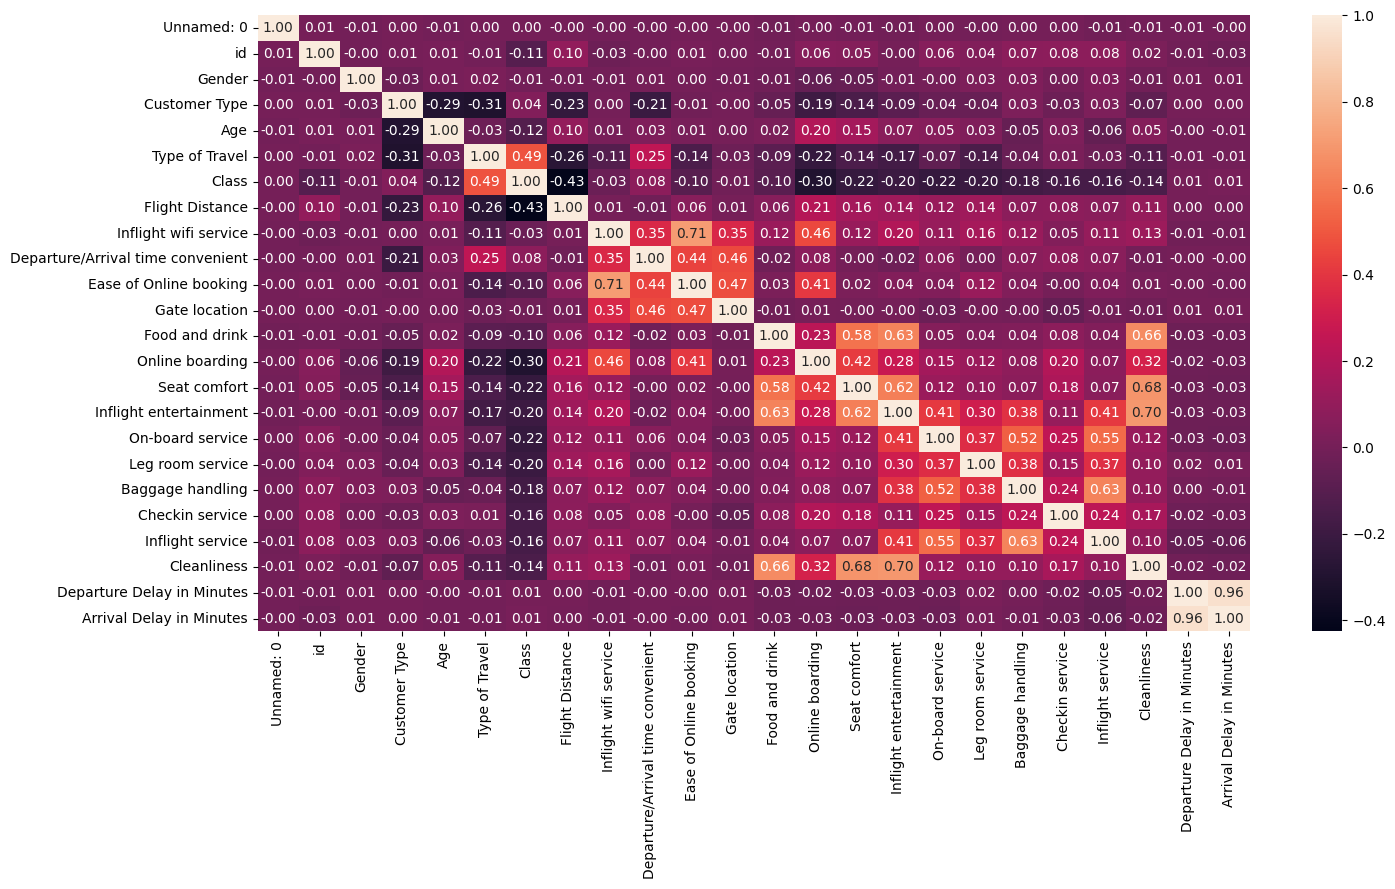

In [689]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.drop(columns='satisfaction').corr(), annot=True, fmt='.2f',)
plt.show()

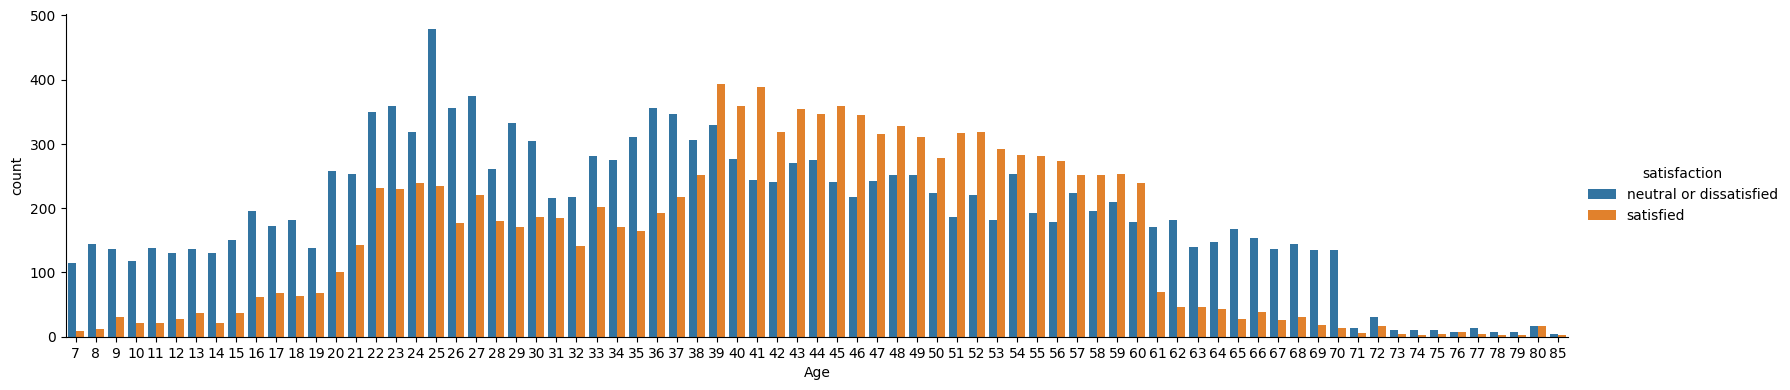

In [690]:
sns.catplot(data=df, x='Age', height=4, aspect=4, kind='count', hue='satisfaction')

In [691]:
## models


In [692]:
X = df.drop(columns='satisfaction')

In [693]:
X.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,19556,0,0,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
1,1,90035,0,0,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
2,2,12360,1,1,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3,3,77959,1,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
4,4,36875,0,0,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0


In [694]:
y = df['satisfaction']
y.head()

0                  satisfied
1                  satisfied
2    neutral or dissatisfied
3                  satisfied
4                  satisfied
Name: satisfaction, dtype: object

In [695]:
### Decision tree


In [696]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

In [697]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [698]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [699]:
predictions = model.predict(X_test)
predictions

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       ..., 'satisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied'], dtype=object)

In [700]:
model_score = accuracy_score(y_test, predictions)
model_score

0.9268668206312548

In [701]:
## Random forest

In [702]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [703]:
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestClassifier()

In [704]:
predictions = model.predict(X_test)
predictions

array(['satisfied', 'satisfied', 'satisfied', ..., 'satisfied',
       'satisfied', 'satisfied'], dtype=object)

In [705]:
model_score = accuracy_score(y_test, predictions)
model_score

0.9576597382602001

In [706]:
### KNeighbordsClassifier

In [707]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [708]:
model = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [709]:
predictions = model.predict(X_test)
predictions

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       ..., 'satisfied', 'satisfied', 'satisfied'], dtype=object)

In [710]:
model_score = accuracy_score(y_test, predictions)
model_score


0.5950731331793687

In [711]:
### Logistic Regression

In [712]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [713]:
model = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [714]:
predictions = model.predict(X_test)
predictions

array(['satisfied', 'neutral or dissatisfied', 'satisfied', ...,
       'satisfied', 'satisfied', 'neutral or dissatisfied'], dtype=object)

In [715]:
model_score = accuracy_score(y_test, predictions)
model_score


0.7661662817551963